*** 
<center><img src="https://cdn-icons-png.flaticon.com/512/6428/6428501.png" width=100 height=100 /></center>
<h1><center>Regression of Used Car Prices</center></h1>

**About the Dataset:**


<img src="https://i.ibb.co/VHgV55n/ds.png" width=1200 height=1200 />

**Goal:**

The goal of this competition is to predict the price of used cars based on various attributes.

**Evaluation** 

*Root Mean Squared Error (RMSE)*


Submissions are scored on the root mean squared error. RMSE is defined as:
<img src="https://mariofilho.com/img/rmse/0.png" width=300 height=300 />


where **yˆi**
 is the predicted value 
 
 and **yi** is the original value for each instance **i**

***

# Import packages

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import gc

import warnings
warnings.filterwarnings('ignore')

# Import data

In [2]:
train = pd.read_csv('datasets/train.csv', index_col=0)
test = pd.read_csv('datasets/test.csv', index_col=0)
extended_data = pd.read_csv('datasets/extended_data.csv')

# Gather basic information

In [3]:
print('Training set')
print(f'Number of rows: {train.shape[0]} \nNumber of cols: {train.shape[1]}')

print('')

print('Testing set')
print(f'Number of rows: {test.shape[0]} \nNumber of cols: {test.shape[1]}')

Training set
Number of rows: 188533 
Number of cols: 12

Testing set
Number of rows: 125690 
Number of cols: 11


In [4]:
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


In [6]:
train.describe(include='all').T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,188533,57,Ford,23088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,188533,1897,F-150 XLT,2945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_year,188533.0,NaN,NaN,NaN,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,NaN,NaN,NaN,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
fuel_type,183450,7,Gasoline,165940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,188533,1117,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,188533,52,A/T,49904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ext_col,188533,319,Black,48658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_col,188533,156,Black,107674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accident,186081,2,None reported,144514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [8]:
train[train.duplicated()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,


## Feature Engineering


In [9]:
# Data Imputation
def rep_na_cat(df):
    df['fuel_type'].fillna('Electric', inplace=True)
    train['accident'].fillna('None reported', inplace=True)
    train['clean_title'].fillna('No', inplace=True)    

In [10]:
rep_na_cat(train)
rep_na_cat(test)

In [11]:
# Extract Horse Power from engine
def ext_hp(df):     
    df['engine_hp'] = [', '.join(map(str, re.findall(r'^[0-9]+.0HP', v))) for v in df['engine']]
    df['engine_hp'] = df['engine_hp'].str.replace('HP', '')
    df['engine_hp'][df['engine_hp'] == ''] = np.nan
    df['engine_hp'] = df['engine_hp'].astype(float)
    df['engine_hp'][df['engine_hp'].isna()] = df['engine_hp'].mean()

In [12]:
ext_hp(train)
ext_hp(test)

In [13]:
# Extract Engine displacement from engine
def ext_displa(df):
    df['engine_displacement'] = [', '.join(map(str, re.findall(r'[0-9].[0-9]+L', v))) for v in df['engine']]
    df['engine_displacement'] = df['engine_displacement'].str.replace('L', '')
    df['engine_displacement'][df['engine_displacement'] == ''] = np.nan
    df['engine_displacement'] = df['engine_displacement'].astype(float)
    df['engine_displacement'][df['engine_displacement'].isna()] = df['engine_displacement'].mean()
    df.drop(columns='engine', inplace=True)

In [14]:
ext_displa(train)
ext_displa(test)

In [15]:
# Source -> https://www.kaggle.com/code/riachoudhari/car-price-prediction-all-regression-models

# Combine transmission into 5 categories

def map_transmission(transmission):
    # Standardize the input
    transmission = transmission.strip().lower()
    
    if any(kw in transmission for kw in ['a/t', 'automatic']):
        return 'Automatic'
    elif any(kw in transmission for kw in ['m/t', 'manual']):
        return 'Manual'
    elif any(kw in transmission for kw in ['cvt', 'variator']):
        return 'Variator'
    elif any(kw in transmission for kw in ['tiptronic']):
        return 'Tiptronic'
    else:
        return 'Other'

In [16]:
train['transmission'] = train['transmission'].apply(map_transmission)
test['transmission'] = test['transmission'].apply(map_transmission)

### Joining extended data

In [17]:
miles_per_gallon = (extended_data[['model', 'model_year','miles_per_gallon','msrp']]
                         .groupby(['model','model_year'])
                         .mean()
                         .reset_index()
                   )

In [18]:
# Merge datasets
def merge_ext(df):
    df = df.merge(miles_per_gallon, left_on=['model','model_year'], right_on=['model','model_year'])    
    return df

In [19]:
test_extended = merge_ext(test)
train_extended = merge_ext(train)

In [20]:
# extract model age
def model_age(df):
    df['model_age'] = pd.to_datetime('today').year - df['model_year']  

In [21]:
model_age(train_extended)
model_age(test_extended)

In [22]:
# replace '-' values with Unknown
def rep_unknown(df):
    for col_name in df.columns:
        df[col_name] = df[col_name].apply(lambda rep: 'Unknown' if rep == '–' else rep)    

In [23]:
rep_unknown(train_extended)
rep_unknown(test_extended)

In [24]:
# Data imputation mode for categorical variables and mean for continous variables
def rep_na(df):
    for col_name in df.columns:
        if df[col_name].isna().sum() > 0 and df[col_name].dtype == 'object':
            df[col_name].fillna(df[col_name].mode()[0], inplace=True)
        elif df[col_name].isna().sum() > 0 and df[col_name].dtype == 'float64':
            df[col_name].fillna(df[col_name].mean(), inplace=True)


In [25]:
rep_na(train_extended)
rep_na(test_extended)

In [26]:
# Extract variable types

continous_var = list(train_extended.select_dtypes(['int','float']).columns)[1:]
categorical_var = list(train_extended.select_dtypes('object').columns)

# Data Prep for the purpose of Data Viz


In [27]:
train_viz = train_extended.copy()

In [28]:
# identify outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [29]:
subset_price = remove_outlier(train_viz, 'price')

In [30]:
subset_milage = remove_outlier(train_viz, 'milage')

In [31]:
# Group price into 3 bins - 'Low-Medium-High'
subset_price['price_txt'] = pd.DataFrame(subset_price['price']).apply(lambda x:pd.cut(x, bins = 3, labels=['Low','Medium','High']), axis = 0)

In [32]:
# Group milage into 3 bins - 'Low-Medium-High'
subset_milage['milage_txt'] = pd.DataFrame(subset_milage['milage']).apply(lambda x:pd.cut(x, bins = 3, labels=['Low','Medium','High']), axis = 0)

In [33]:
train_viz['price_txt'] = train_viz.merge(subset_price, how='left')['price_txt'].astype('object')

In [34]:
train_viz['milage_txt'] = train_viz.merge(subset_milage, how='left')['milage_txt'].astype('object')

In [35]:
train_viz['price_txt'].fillna('Extremely High (Outlier)', inplace=True)

In [36]:
train_viz['milage_txt'].fillna('Extremely High (Outlier)', inplace=True)

In [37]:
train_viz['price_txt_sorted'] = [1 if pt == 'Low' else 2 if pt == 'Medium' else 3 if pt == 'High' else 4 
                                for pt in train_viz['price_txt']]

In [38]:
train_viz['milage_txt_sorted'] = [1 if mt == 'Low' else 2 if mt == 'Medium' else 3 if mt == 'High' else 4 
                                for mt in train_viz['milage_txt']]

In [39]:
train_viz.to_csv('datasets/train_viz.csv')

# Exploratory Data Analysis

* ## Power BI Viz
### [Regression Used Car Price](https://app.powerbi.com/view?r=eyJrIjoiYzllNTczNTQtYmI3My00M2JiLTk2MGUtZjMzMTVmYTkzNDhkIiwidCI6IjhkODQwNjdkLTlhZDctNDU3Mi05YjEwLTEzM2QzNjQ2MmFhYSIsImMiOjF9)

![Students Overall](https://i.ibb.co/hxGmnT4/2024-10-09-12-40-28-Regression-of-Used-Car-Prices.png, "Power BI Viz")





![Students Overall](https://i.ibb.co/WtpK9RS/2024-10-09-12-40-42-Regression-of-Used-Car-Prices.png, "Power BI Viz")





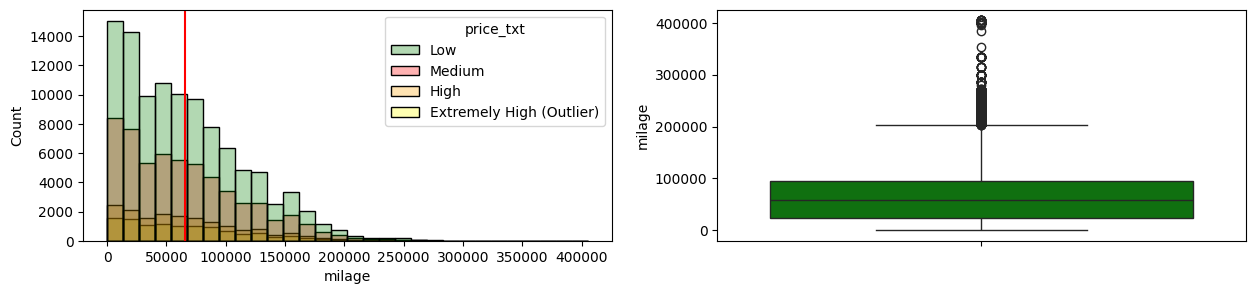

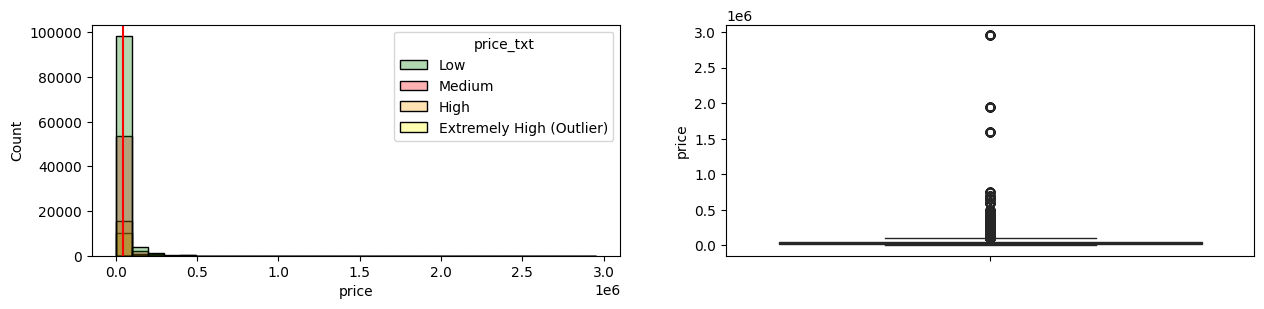

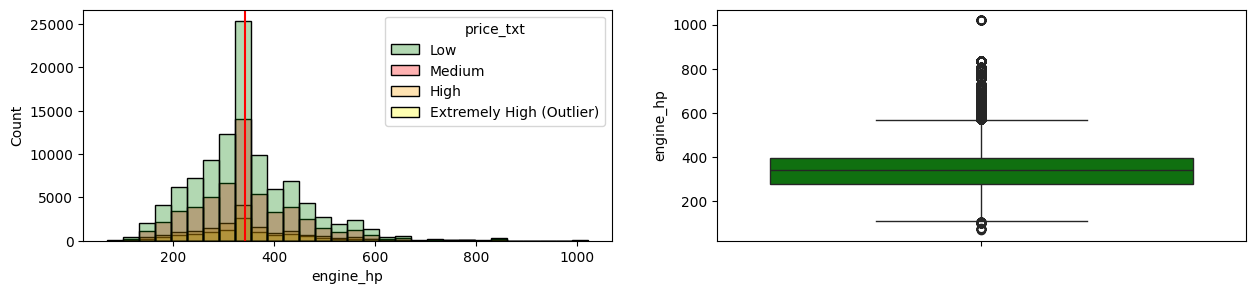

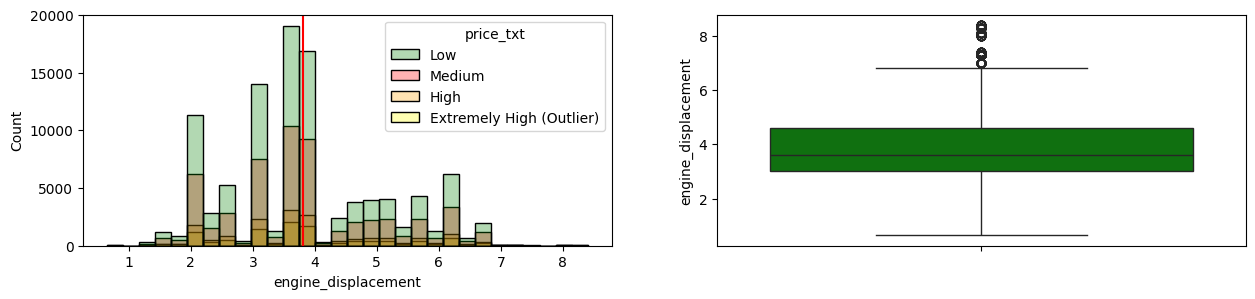

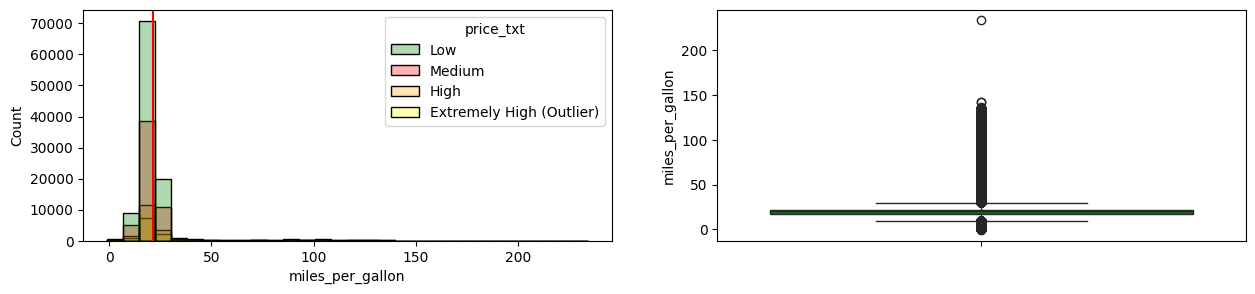

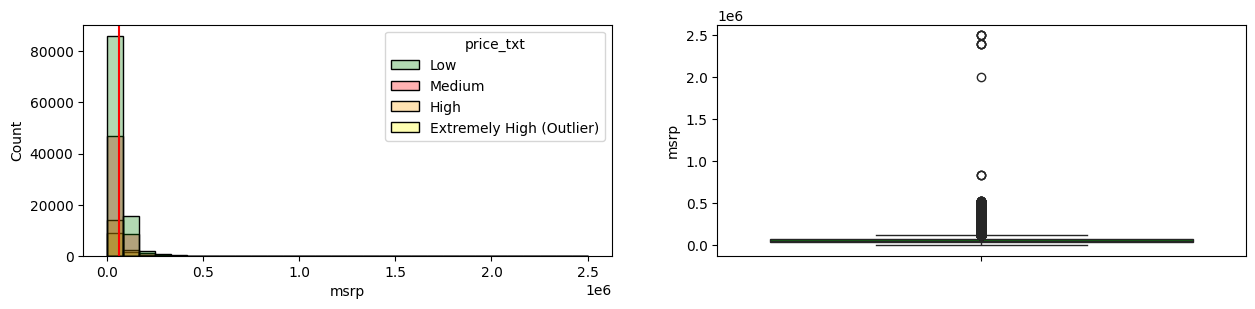

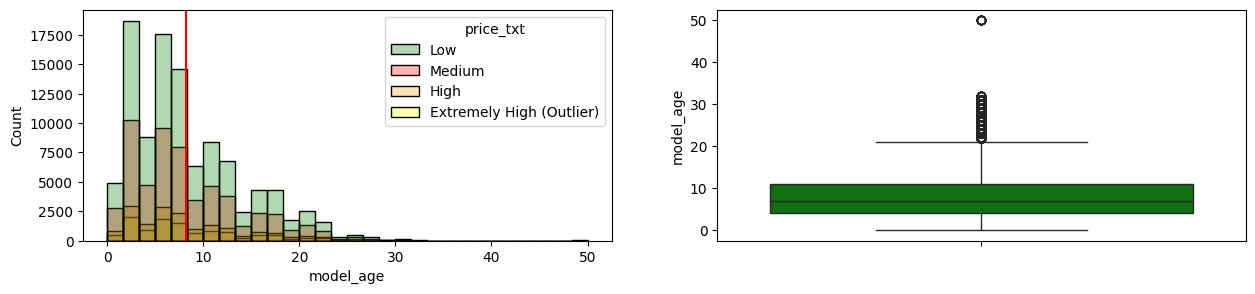

In [41]:
palette = ['green', 'red', 'orange', 'yellow' ]

for num_var in continous_var:    

    fig, ax = plt.subplots(1, 2, figsize=(15, 3))   
    
    # Histograms    
    sns.histplot(data=train_viz, 
                      x=num_var,
                      bins = 30,
                      hue = 'price_txt',
                      palette=palette,
                      #kde=True,
                      alpha=0.3,
                      ax=ax[0]                          
                ) 
    # Mean vertical line
    ax[0].axvline(np.mean(train_viz[num_var]), color="red")   
    
    # Boxplots
    sns.boxplot(data=train_viz, 
                     y=num_var,
                    # hue = 'price_txt',
                     palette=palette,
                     #showfliers=False,
                     ax=ax[1]
                   );

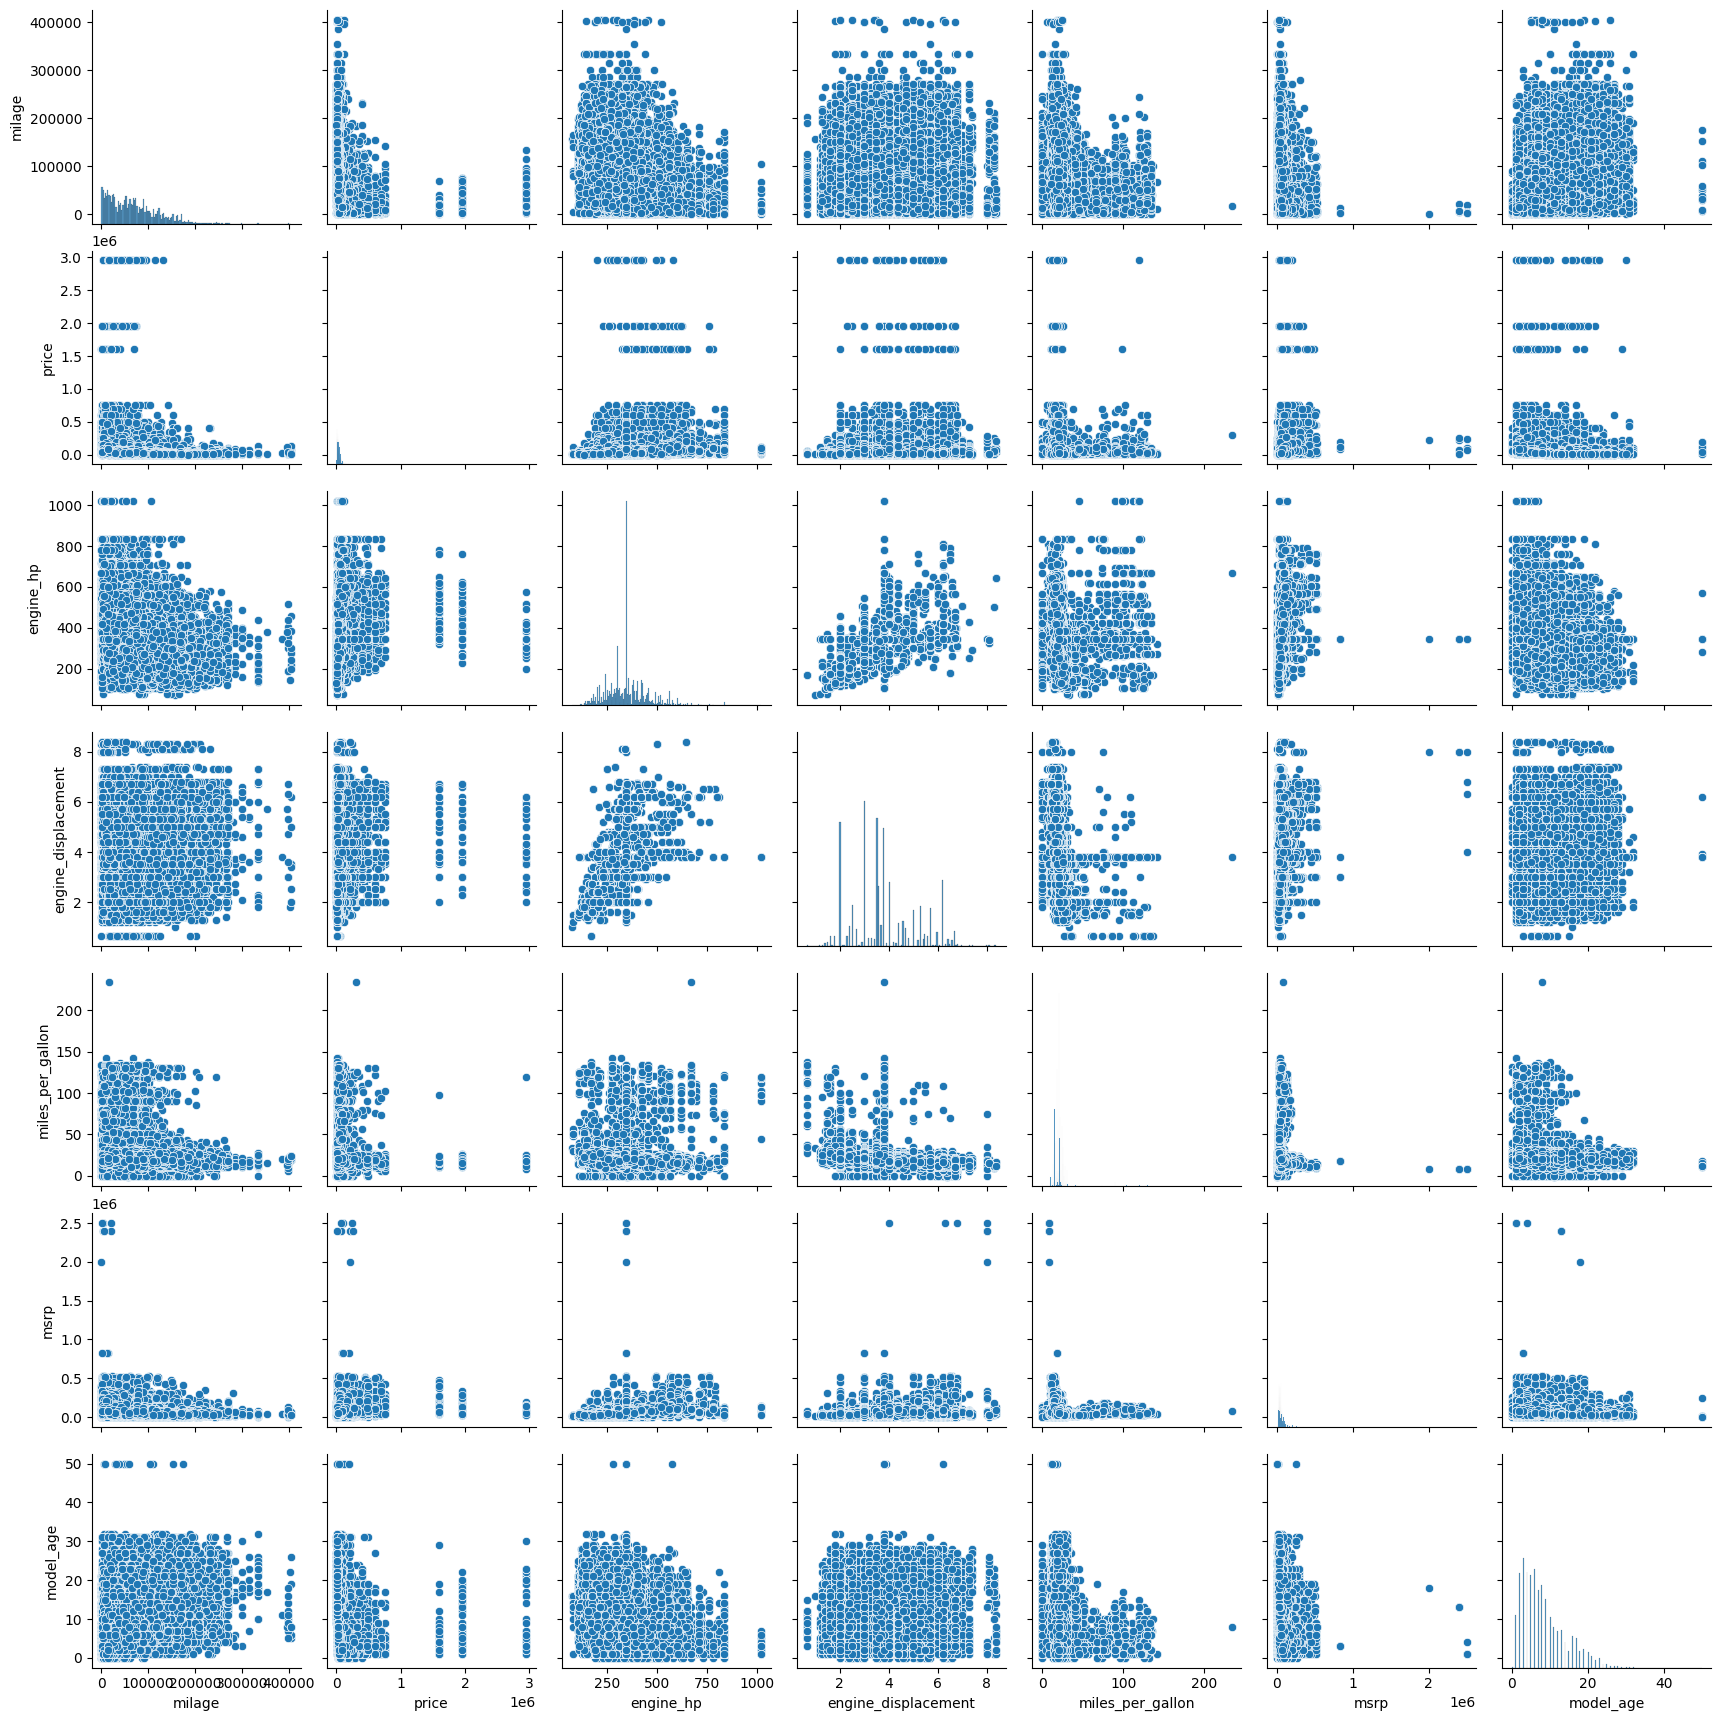

In [42]:
sns.pairplot(train_extended[continous_var]);

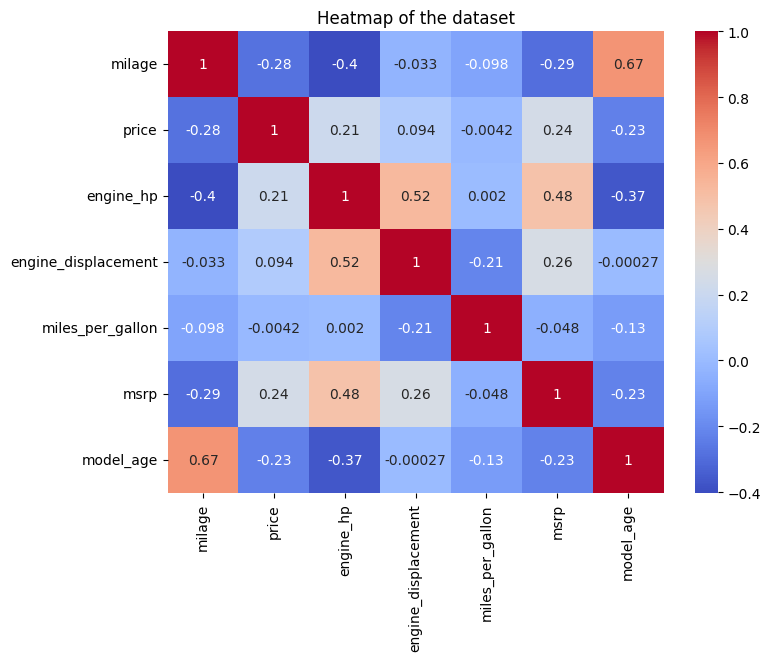

In [43]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(train_extended[continous_var]
            .corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap of the dataset')
plt.show()

In [44]:
enc_vars = ['fuel_type','transmission','accident','clean_title']

train_extended_dummies = pd.get_dummies(train_extended[enc_vars], dtype=int, drop_first=True)
train_extended = train_extended.drop(columns=enc_vars)
train_extended = pd.concat([train_extended, train_extended_dummies], axis=1)

test_extended_dummies = pd.get_dummies(test_extended[enc_vars], dtype=int, drop_first=True)
test_extended = test_extended.drop(columns=enc_vars)
test_extended = pd.concat([test_extended, test_extended_dummies], axis=1)

In [45]:
from sklearn.preprocessing import LabelEncoder

train_enc = train_extended.copy()

#test_enc = test.copy()

# Encode the categorical variables
enc = LabelEncoder()

for var in ['brand','model','ext_col', 'int_col']:
    train_enc[var] = enc.fit_transform(train_enc[var])

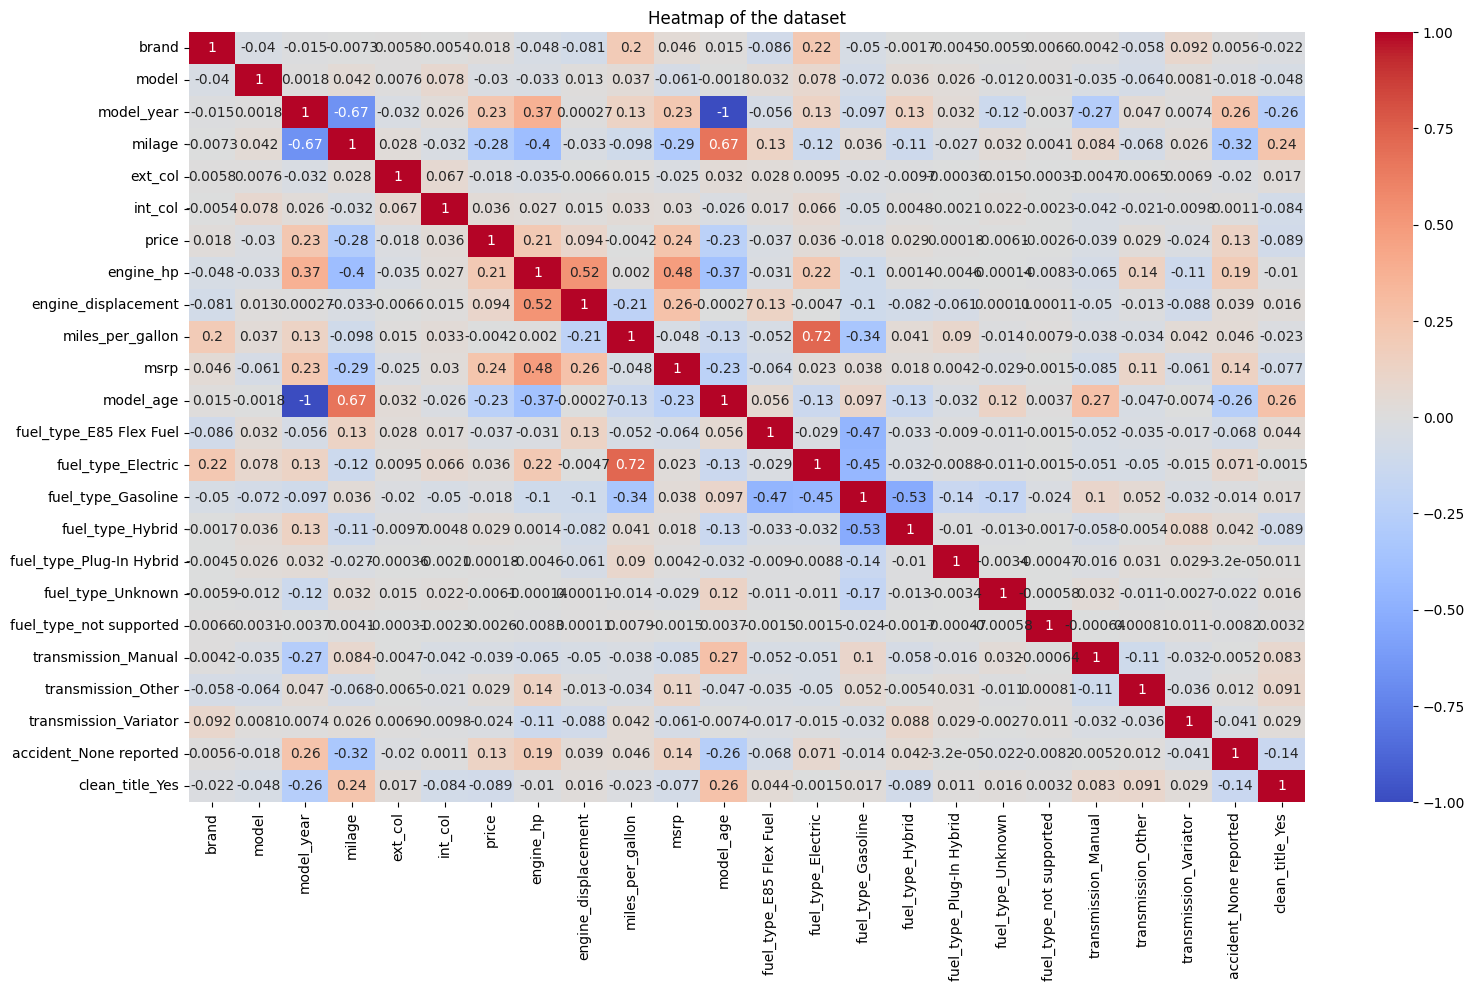

In [46]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(18, 10))
sns.heatmap(train_enc
            .corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap of the dataset')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split


X = train_enc.drop(columns='price')

y = train_enc['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Selection

### Random Forest Regressor - Baseline RMSE (74253.858)

In [55]:
%%time
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

Wall time: 1min 28s


In [57]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RandomForest Regressor RMSE: {rmse:.3f}')

RandomForest Regressor RMSE: 74253.858


### Random Forest Regressor - Tuned RMSE (69230.917)

In [70]:
rf_param_grid = {
            'bootstrap': True,
            'max_depth': 20,
            'max_features': 6,
            'min_samples_leaf': 5,
            'min_samples_split': 10,
            'n_estimators': 1000
}

In [72]:
rf_opt = (RandomForestRegressor(**rf_param_grid)
          .fit(X_train, y_train)
         )

In [75]:
y_pred_rf_opt = rf_opt.predict(X_test)

In [162]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_opt))
print(f'RandomForest Regressor RMSE: {rmse:.3f}')

RandomForest Regressor RMSE: 69230.917


### XGBoost Regressor Baseline RMSE(71493)

In [77]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [78]:
y_pred_xgb = xgb.predict(X_test)

In [80]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'RandomForest Regressor RMSE: {rmse:.3f}')

RandomForest Regressor RMSE: 71493.732


### XGBoost Regressor Tuned RMSE(69067.668)

In [158]:
xgb_best_params =  {'colsample_bytree': 0.8,
                     'learning_rate': 0.01,
                     'max_depth': 5,
                     'min_child_weight': 7,
                     'n_estimators': 1000,
                     'subsample': 0.8}

In [159]:
xgb_opt = (XGBRegressor(**xgb_best_params)
               .fit(X_train, y_train)
          )

In [160]:
y_pred_xgb_opt = xgb_opt.predict(X_test)

In [161]:
# mse = mean_squared_error(y_eval, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb_opt))
print(f'XGBRegressor RMSE: {rmse:.3f}')

XGBRegressor RMSE: 69067.668


In [ ]:
predictions = xgb_opt.predict(test_enc)

In [ ]:
submission_df = pd.DataFrame({'id':test_enc['id'],
                              'price':predictions})

In [ ]:
submission_df.to_csv('submission.csv', index=False)
submission_df.head()



<center><img src="https://cdn.prod.website-files.com/646218c67da47160c64a84d5/64634be786d11debe86c8c42_86.png" width=200 height=200 /></center>